In [1]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from seaborn.algorithms import bootstrap
from seaborn.utils import ci

from tmp.utils import formatter


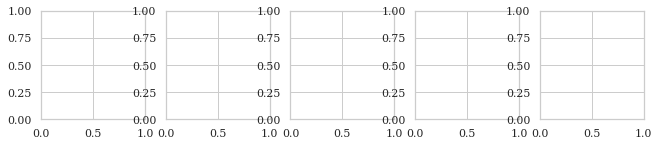

In [2]:
form = FuncFormatter(formatter)

plt.rc('font', family='serif')
plt.rc('text', usetex=False)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89",  "#FFFACD", "#EFCC00"]

df = pd.read_csv("../data/users_neighborhood_anon.csv")
df = df[df["created_at"].notnull()]

f, axzs = plt.subplots(1, 5, figsize=(10.8, 2))
axzs = [axzs]
boxprops = dict(linewidth=0.3)
whiskerprops = dict(linewidth=0.3)
capprops = dict(linewidth=0.3)
medianprops = dict(linewidth=1)

df["tweet_number"] = df["tweet number"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["created_at"] = -(df["created_at"] - datetime.datetime(2017, 12, 29).timestamp())/86400


df["statuses_count"] = df["statuses_count"] / df["created_at"]
df["followers_count"] = df["followers_count"] / df["created_at"]
df["followees_count"] = df["followees_count"] / df["created_at"]


In [3]:
attributes_all = [["statuses_count", "followers_count", "followees_count", "favorites_count", "time_diff"]]

titles_all = [["\#tweets/day", "\#followers/day", "\#followees/day", "\#favorites", "avg(interval)"]]

first = True
for axs, attributes, titles in zip(axzs, attributes_all, titles_all):

    for axis, attribute, title in zip(axs, attributes, titles):
        N = 6
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df.is_63_2 == True],
               df[df.is_63_2 == False]]
        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category in men:
            boots = bootstrap(category[attribute], func=np.nanmean, n_boot=1000)
            ci_tmp = ci(boots)
            average = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_average = (ci_tmp[1] - ci_tmp[0]) / 2
            averages.append(average)
            averages_ci.append(ci_average)
            boots = bootstrap(category[attribute], func=np.nanmedian, n_boot=1000)
            ci_tmp = ci(boots)
            median = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_median = (ci_tmp[1] - ci_tmp[0]) / 2
            medians.append(median)
            medians_ci.append(ci_median)

            tmp.append(category[attribute].values)

        ind = np.array([0, 1, 2, 3, 4, 5])
        width = .6

        _, n_h = stats.ttest_ind(tmp[0], tmp[1], equal_var=False, nan_policy='omit')
        _, nn_nh = stats.ttest_ind(tmp[2], tmp[3], equal_var=False, nan_policy='omit')
        _, s_ns = stats.ttest_ind(tmp[4], tmp[5], equal_var=False, nan_policy='omit')

        print(title)
        print(n_h)
        print(nn_nh)
        print(s_ns)
        rects = axis.bar(ind, averages, width, yerr=averages_ci, color=color_mine,
                         ecolor="#212823", edgecolor=["#4D1A17"]*6, linewidth=.3)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(3.5, ls='dashed', linewidth=0.3, color="#C0C0C0")


\#tweets/day
1.2789636632978333e-06
8.865295569484873e-39
7.459813661781633e-10
\#followers/day
0.0030565961928909514
1.1868930519756187e-19
1.0369700326377058e-16
\#followees/day
5.772724179343999e-07
1.5011444501881624e-22
0.00045935269484532034
\#favorites
0.009072542767272911
1.5112790159842322e-28
0.07865454001988223
avg(interval)
9.696788298905948e-08
0.16310610564236422
4.7837282076570465e-22


In [4]:
f.legend((rects[0], rects[1], rects[2], rects[3], rects[4], rects[5]),
         ('Hateful User', 'Normal User', 'Hateful Neigh.', 'Normal Neigh.', 'Suspended', 'Active'),
         loc='upper center',
         fancybox=True, shadow=True, ncol=6)
f.tight_layout(rect=[0, 0, 1, .95])



In [5]:
f.savefig("results/activity_analysis.pdf")

In [6]:
df.columns

Index(['user_id', 'hate', 'hate_neigh', 'normal_neigh', 'statuses_count',
       'followers_count', 'followees_count', 'favorites_count', 'listed_count',
       'betweenness',
       ...
       'c_medieval_empath', 'c_journalism_empath', 'c_farming_empath',
       'c_plant_empath', 'c_shopping_empath', 'c_ship_empath',
       'c_religion_empath', 'c_tourism_empath', 'c_power_empath',
       'tweet_number'],
      dtype='object', length=1040)